### Differential Equations

#### Algorithms to solve Differential Equations with initial conditions. The methods used here: Euler's Method, Runge Kutta Order 2 and Runge Kutta Order 4.
#### All the algorithms here are executed for a second order differential equation - as can be seen in the example. For higher order differential equations, use the same concept as shown in these methods

In [7]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import scipy
from numpy import sqrt, sin, cos, pi, abs, arctan,tan, linspace, polyfit
import sympy
import math


# Euler method
def euler_method(rng, f, h, init):
    # input: rng is the range examined for the given function, given as [a,b]
    #        f is the original function
    #        h is the size of the step
    #        init is the initial condition for the zeroth and first derivative of the function
    
    n = int((rng[1] - rng[0])/h) # number of iterations
    
    # initialize vectors
    r_vec = np.zeros(n,float)
    r_prime_vec = np.zeros(n,float)
    
    # initial parameters
    r_vec[0] = init[0]
    r_prime_vec[0] = init[1]
    
    # Use the Euler Method step to solve the differential equation
    for i in range(0,n-1):
        r_vec[i+1] = r_vec[i] + h * r_prime_vec[i]
        r_prime_vec[i+1] = r_prime_vec[i] + h*f(r_vec[i] , r_prime_vec[i])
        
    return [r_vec,r_prime_vec]


# Runge - Kutta Second Order Method
def runge_kutta_sec_order(rng, f, h, init):
    # input: rng is the range examined for the given function, given as [a,b]
    #        f is the original function
    #        h is the size of the step
    #        init is the initial condition for the zeroth and first derivative of the function
    
    n = int((rng[1] - rng[0])/h) # number of iterations
    
    # vector initialization using the initial parameters
    r_vec = [init[0]]
    r_prime_vec = [init[1]]
    
    # Use the Runge Kutta Second Order Method to solve the differential equation
    # See theory on Runge Kutta for deeper understanding
    for i in range(0,n-1):
        k1_r = h * r_prime_vec[-1] # k1 for r vector
        k1_r_prime = h * f(r_vec[-1], r_prime_vec[-1]) # k1 for r prime vector
        k2_r_prime = h * f(r_vec[-1] + k1_r, r_prime_vec[-1] + k1_r_prime) # k2 for r prime vector
        r_prime_vec.append(r_prime_vec[-1] + (1/2) * (k1_r_prime + k2_r_prime))
        k2_r = h * (r_prime_vec[-1]) # k2 for r vector
        r_vec.append(r_vec[-1] + (1/2) * (k1_r + k2_r))
        
    return [r_vec,r_prime_vec]


# Runge - Kutta Fourth Order Method
def runge_kutta_fourth_order(rng, f, h, init):
    # input: rng is the range examined for the given function, given as [a,b]
    #        f is the original function
    #        h is the size of the step
    #        init is the initial condition for the zeroth and first derivative of the function
    
    n = int((rng[1] - rng[0])/h) # number of iterations
    
    # vector initialization using the initial parameters
    r_vec = [init[0]]
    r_prime_vec = [init[1]]
    
    # Use the Runge Kutta Fourth Order Method to solve the differential equation
    # See theory on Runge Kutta for deeper understanding
    for i in range(0,n-1):
        k1_r = h * (r_prime_vec[-1]) # k1 for r vector
        k1_r_prime = h * f(r_vec[-1], r_prime_vec[-1]) # k1 for r1 vector
        k2_r = h * (r_prime_vec[-1] + k1_r_prime/2) # k2 for r vector
        k2_r_prime = h * f(r_vec[-1] + k1_r/2, r_prime_vec[-1] + k1_r_prime/2) # k2 for r1 vector
        k3_r = h * (r_prime_vec[-1] + k2_r_prime/2) # k3 for r vector
        k3_r_prime = h * f(r_vec[-1] + k2_r/2, r_prime_vec[-1] + k2_r_prime/2) # k3 for r1 vector
        k4_r_prime = h * f(r_vec[-1] + k3_r, r_prime_vec[-1] + k3_r_prime) # k4 for r1 vector
        r_prime_vec.append(r_prime_vec[-1] + (1/6) * (k1_r_prime + (2 * k2_r_prime) + (2 * k3_r_prime) + k4_r_prime))     
        k4_r = h * (r_prime_vec[-1]) # k4 for r vector
        r_vec.append(r_vec[-1] + (1/6) * (k1_r + (2 * k2_r) + (2 * k3_r) + k4_r))

    return [r_vec,r_prime_vec]


##### Example: Solving the differential equation
##### $ \frac{1}{r^2}\frac{d}{d\psi}(\frac{1}{r^2}\frac{dr}{d\psi}) - \frac{1}{r^3} + \frac{1}{r^2} = 0 $
##### with the initial conditions: $r(\psi = 0) = \frac{2}{3}; r'(\psi=0) = 0$. 
##### This equation can be simplified to:
$r'' = \frac{2}{r}\cdot(r'^2) + r\cdot(1-r) $

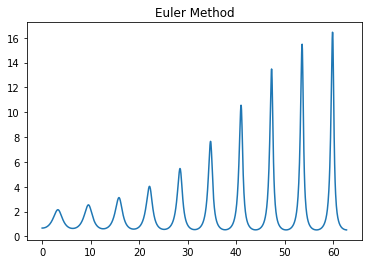

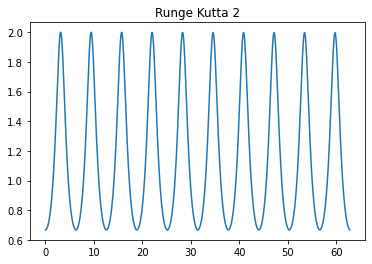

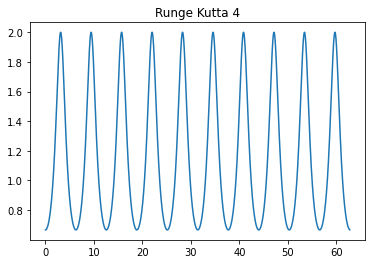

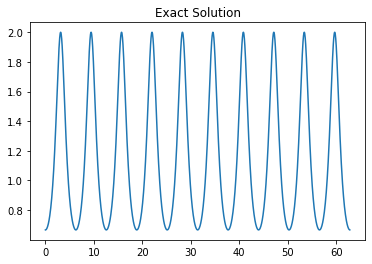

In [8]:
# create the differential equation for the example
def f(r,r_prime):
    return (2/r) * (r_prime**2) + r*(1-r)


h = 0.05 # step size
rng = [0.0,20*np.pi] # boundaries
psi = np.arange(rng[0],rng[1],h)
init = [2/3,0.0]

em = euler_method(rng,f,h,init)
rk2 = runge_kutta_sec_order(rng,f,h,init)
rk4 = runge_kutta_fourth_order(rng,f,h,init)


# Euler Method Plot
plt.plot(psi[0:1256],em[0])
plt.title('Euler Method')
plt.show()

# Runge Kutta second order plot
plt.plot(psi[0:1256],rk2[0])
plt.title('Runge Kutta 2')
plt.show()

# Runge Kutta fourth order plot
plt.plot(psi[0:1256],rk4[0])
plt.title('Runge Kutta 4')
plt.show()


# The analytical solution for the example differential equation
def exact(x):
    return (1/(1+(1/2)*np.cos(x)))

ex = exact(psi)

plt.plot(psi,ex)
plt.title('Exact Solution')
plt.show()